## Titanic - Machine Learning from Disaster

One of the main objectives of this project is to predict the survival on the Titanic and also get more familiar  with ML basics 


### Problem Statement 
The sinking of the RMS Titanic was a tragedy that resulted in significant loss of life, raising questions about the factors that influenced survival during the disaster. With limited lifeboats available, survival was not only a matter of chance but may have been influenced by individual characteristics such as age, gender, and socio-economic class.

This project aims to build a predictive model using passenger data to answer the question:
“What factors most significantly determined a passenger’s likelihood of survival during the Titanic disaster?”

By analyzing data on passenger demographics and other characteristics, the goal is to uncover patterns and insights that can provide a better understanding of survival dynamics in crisis situations.



### Objectives

1. Build a Predictive Model
Develop a machine learning model to predict the likelihood of survival for passengers based on demographic and socio-economic data.

2. Identify Key Factors
Analyze the impact of variables such as age, gender, socio-economic class, and others to determine the most significant predictors of survival.

3. Understand Survival Patterns
Uncover trends and relationships within the data that reveal how different groups of passengers were affected during the disaster.

4. Provide Insights for Crisis Preparedness
Leverage findings to contribute to discussions on safety and evacuation protocols in similar crisis scenarios.

5. Enhance Data Science Skills
Apply data preprocessing, exploratory data analysis, feature engineering, and model evaluation techniques to a real-world dataset.

In [1018]:
#import libraries to be used in the project
import pandas as pd
import numpy as np 

In [1019]:
# load the dataset 
data = pd.read_csv("Data/train.csv", index_col= False)
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [1020]:
#check data info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From the output above, there are 12 coulmsns and some columns have null values such as in age and cabin. The datatypes in the dataset have both numerical and categorical values

In [1021]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1022]:
#let us handle the null values 
data.isnull().sum() / len(data) *100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [1023]:
#the cabin column has ~ 77% of the rows missing values, I will drop that column as it wont have much of a 
#significance 
data.drop('Cabin', axis=1, inplace=True)


In [1024]:
data.isna().sum() / len(data) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Embarked        0.224467
dtype: float64

In [1025]:
 #impute the age column with the median value 
data['Age'].fillna(data['Age'].median(), inplace= True)

In [1026]:
#impute the rows in the embarked  column with the mode value
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace= True)

In [1027]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [1028]:
titanic_data = data

In [1029]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [1030]:
# Check for duplicates in the dataset
duplicate_rows = titanic_data[titanic_data.duplicated()]

# Print the number of duplicate rows
print(f'Number of duplicate rows: {duplicate_rows.shape[0]}')

Number of duplicate rows: 0


### Check for outliers 



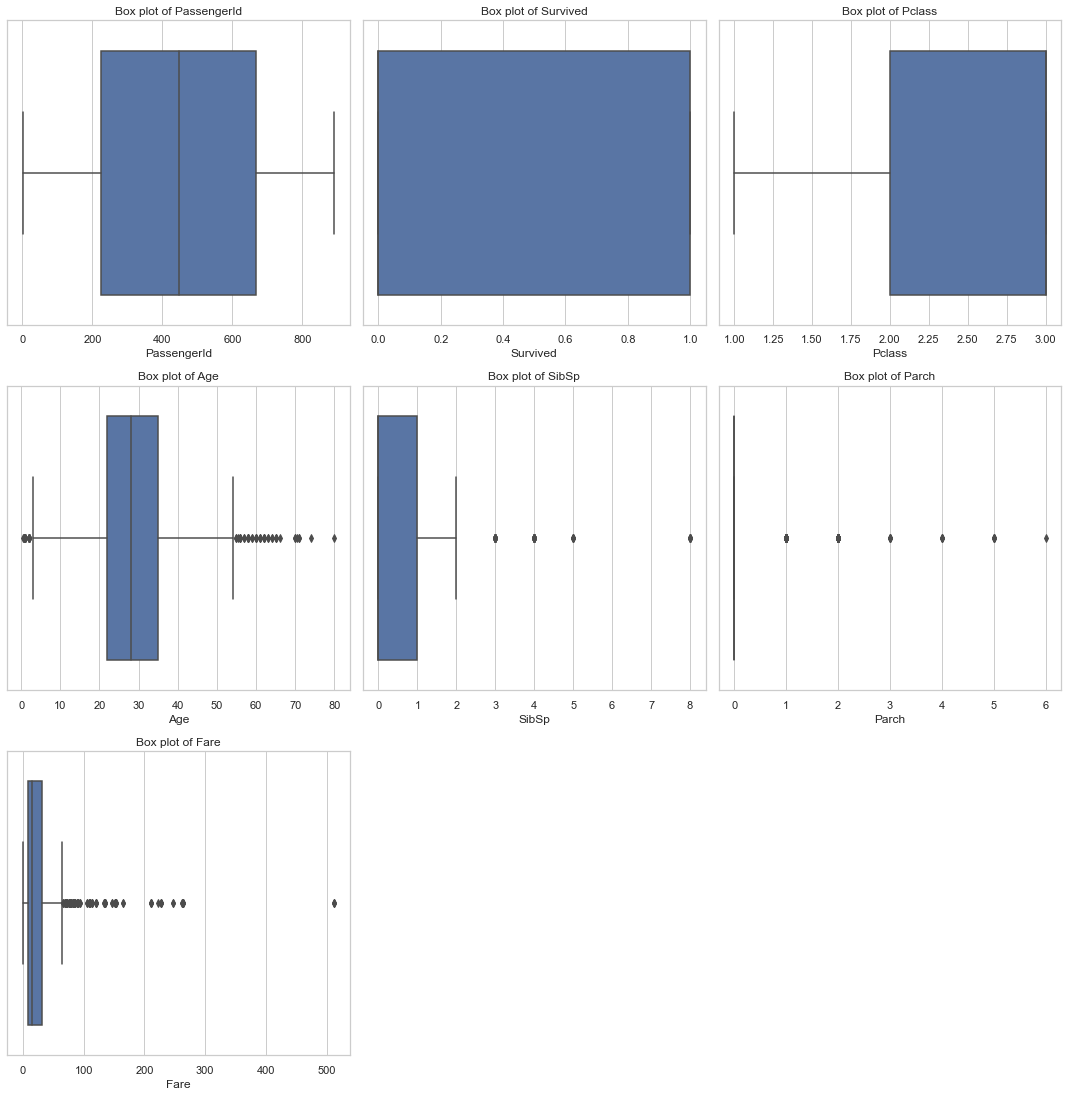

In [1031]:
#check for outliers
#use box plots to check for the numerical columns in the dataset 

# Set the size of the plots
plt.figure(figsize=(15, 20))

# Loop through each numerical column and create a box plot
for i, column in enumerate(titanic_data.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(len(titanic_data.columns) // 3 + 1, 3, i)
    sns.boxplot(x=titanic_data[column])
    plt.title(f'Box plot of {column}')
    plt.tight_layout()

plt.show()

## Data Preparation
1. Data Cleaning. 
I checked for missing data, which I found missing data, Missing values can skew the analysis and lead to incorrect conclusions.
I imputed the age column with the median value and I imputed the rows in the embarked column with the mode value
 * I also checked for duplicates which there were none for ths dataset. Duplicate data can lead to biased model training and inaccurate results.
2. Data Transformation. 
The dataset included categorical variables such as International Plan, Voice Mail Plan, and Area Code. These were transformed into numerical values using techniques like one-hot encoding or label encoding to make them suitable for machine learning models.
Feature Scaling: Features like Total Day Minutes, Total Day Calls, and other numerical variables were scaled to ensure that all features contributed equally to the model.

3. Feature Selection
Features that were highly correlated with each other, such as Total Day Minutes and Total Day Charge, were analyzed to decide whether both were necessary for the model. In cases where multicollinearity was identified, one of the correlated features was removed to prevent redundancy and improve model interpretability.

4. Splitting the data
Training and Testing Split: The data was split into training and testing sets, typically using an 70-30 split. The training set was used to train the model, while the testing set was reserved for evaluating the model's performance on unseen data. This helps in assessing the model's generalization capability.

* Cross-Validation: To further validate the model, cross-validation techniques like k-fold cross-validation were used. This involved splitting the training data into k subsets, training the model k times, each time using a different subset as the validation set, and the remaining data as the training set. This approach helps in reducing overfitting and provides a more robust estimate of the model's performance.





## EDA

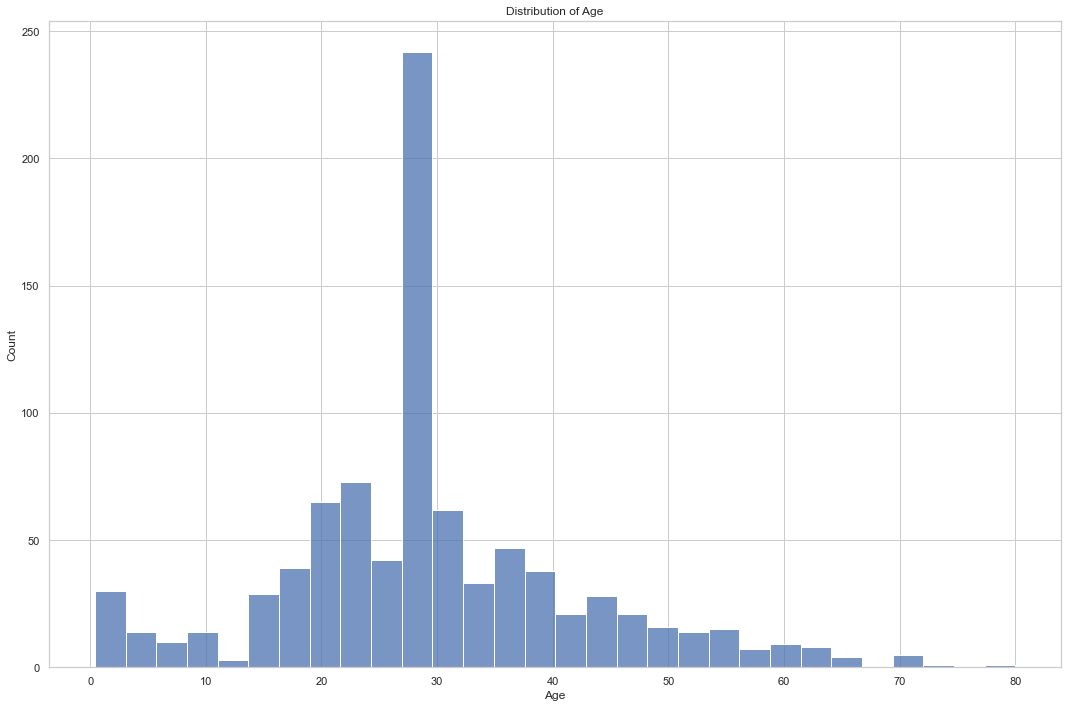

In [1032]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Univariate analysis of numerical features
#numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']

plt.figure(figsize=(15, 10))
sns.histplot(titanic_data['Age'])
plt.title(f'Distribution of Age')
plt.tight_layout()
plt.show()

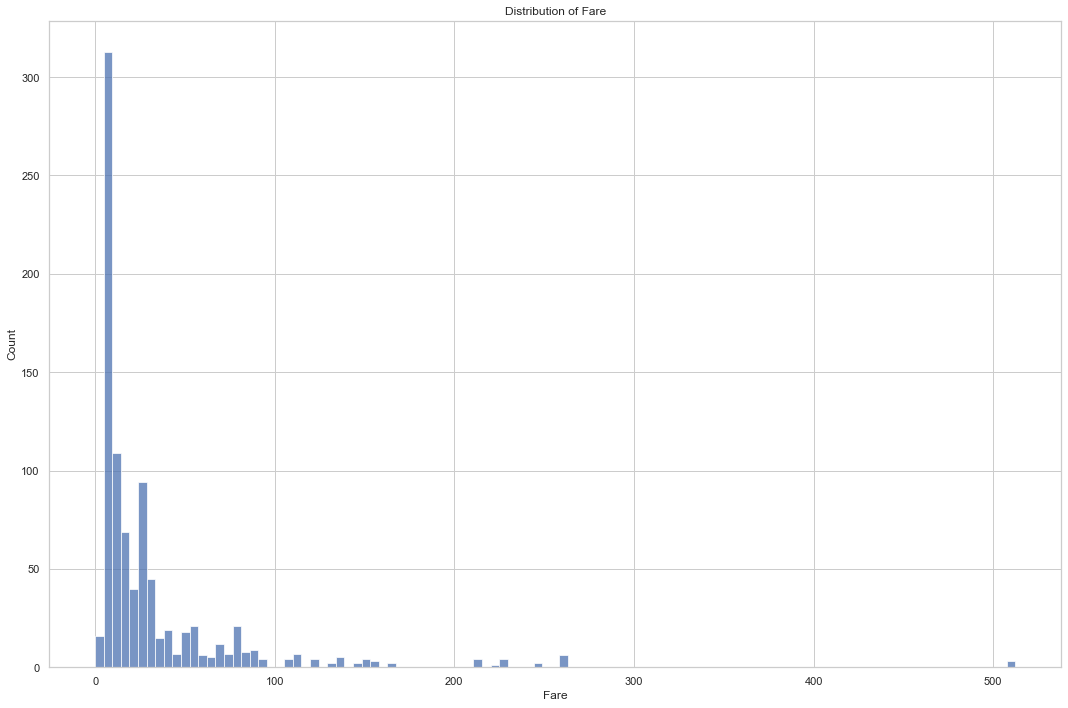

In [1033]:
# Univariate analysis of numerical features

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Univariate analysis of numerical features
#numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']

plt.figure(figsize=(15, 10))
sns.histplot(titanic_data['Fare'])
plt.title(f'Distribution of Fare')
plt.tight_layout()
plt.show()

From the histogram above there seems to be an outlier in the fare prices. Further research can be done to establish how much the fare costed to prove the outlier. After research, the average first class ticket costed roughly 400 dollars, hence there may have been a typing error to have a ticket costing more than 500 dollars. 
The outlier will be removed.  

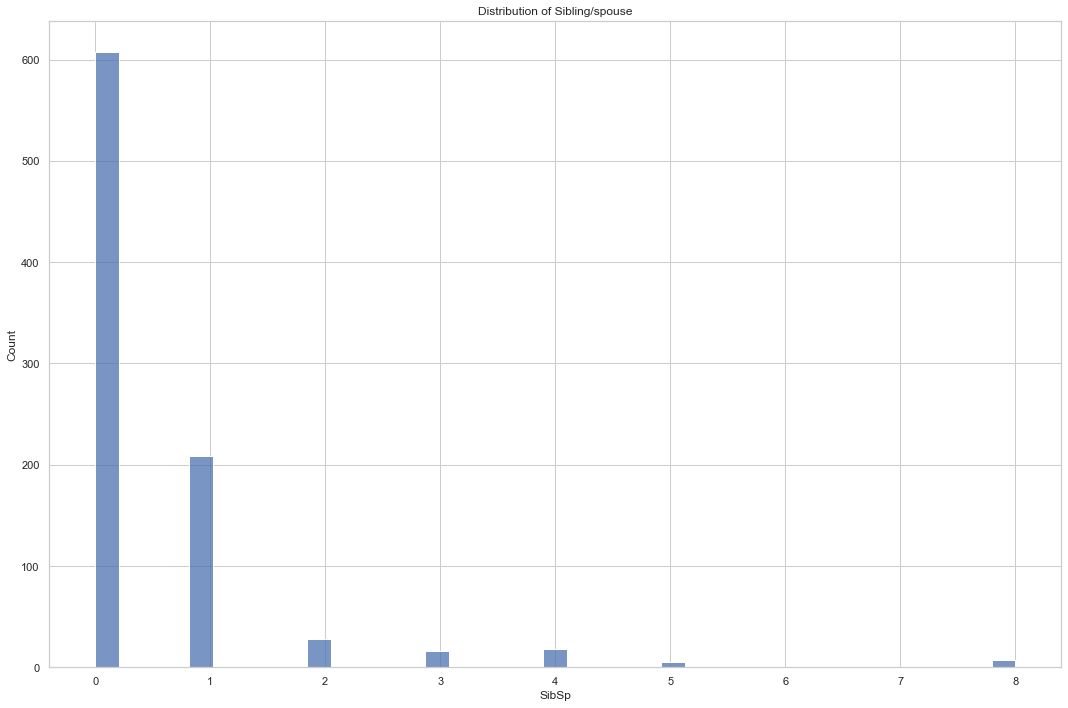

In [1034]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Univariate analysis of numerical features
#numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']

plt.figure(figsize=(15, 10))
sns.histplot(titanic_data['SibSp'])
plt.title(f'Distribution of Sibling/spouse')
plt.tight_layout()
plt.show()

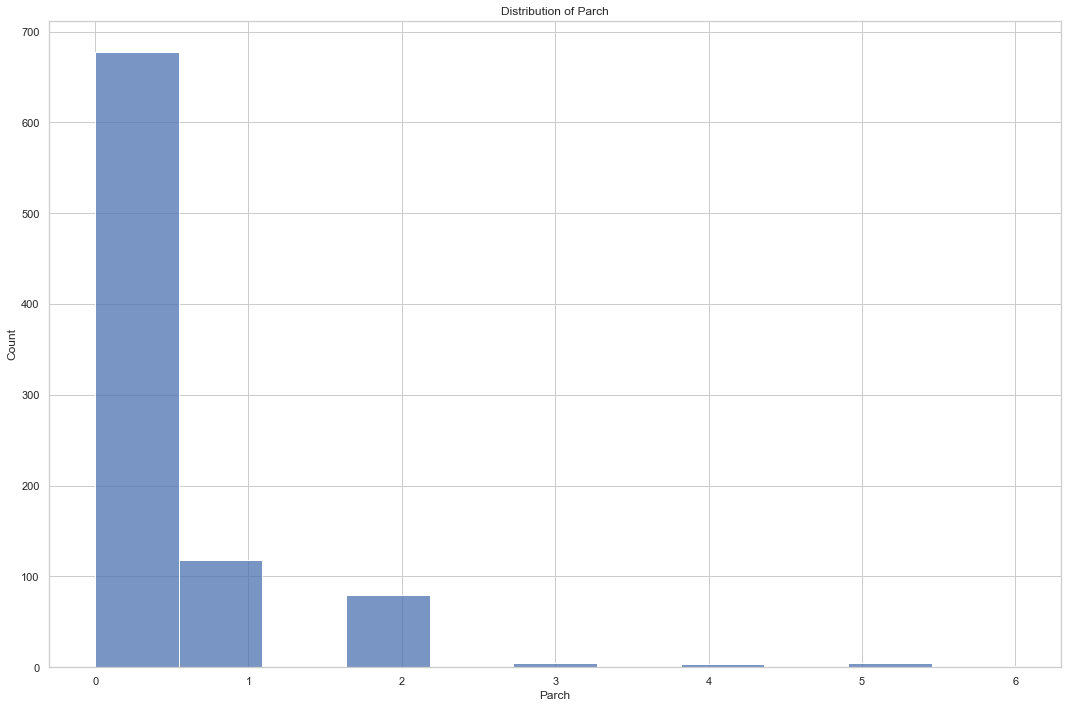

In [1035]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Univariate analysis of numerical features
#numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']

plt.figure(figsize=(15, 10))
sns.histplot(titanic_data['Parch'])
plt.title(f'Distribution of Parch')
plt.tight_layout()
plt.show()

### Categorical Features Analysis -sex, ticket, embarked 

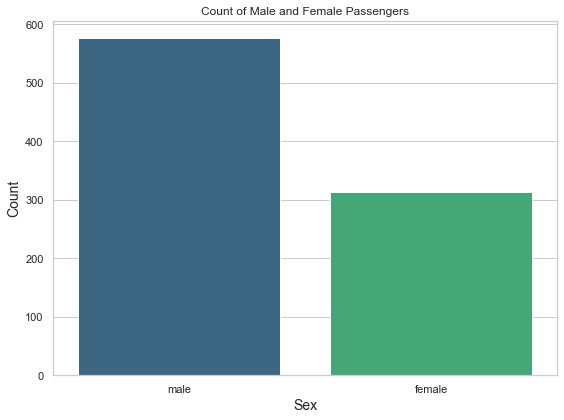

In [1036]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', data=titanic_data, palette='viridis') 
plt.title(f'Count of Male and Female Passengers')
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

The ticket column is of an object datatype - which contains strings and numbers. I  was curious about how this column had any impact on the survival rate of the passengers or its overall importance in the dataset. Could it be that passengers who had tickets with a certain prefix survived more than others without? 

In [1037]:
# Extract prefixes and numeric components
titanic_data['Ticket_Prefix'] = titanic_data['Ticket'].str.extract(r'([A-Za-z./]+)').fillna('None')
titanic_data['Ticket_Number'] = titanic_data['Ticket'].str.extract(r'(\d+)$')

# Analyze prefix distribution
print(titanic_data['Ticket_Prefix'].value_counts())



# Drop the original Ticket column if not needed
#titanic_data.drop('Ticket', axis=1, inplace=True)


Ticket_Prefix
None          661
PC             60
C.A.           27
A/             23
STON/O         18
W./C.           9
CA.             8
SOTON/O.Q.      8
SOTON/OQ        7
CA              6
C               5
F.C.C.          5
SC/PARIS        5
S.O.C.          5
SC/Paris        4
LINE            4
S.O./P.P.       3
PP              3
SC/AH           3
S.C./PARIS      2
P/PP            2
SOTON/O         2
A./             2
A.              2
WE/P            2
S.W./PP         1
F.C.            1
A/S             1
SC              1
S.O.P.          1
SCO/W           1
SW/PP           1
W/C             1
Fa              1
A               1
W.E.P.          1
SO/C            1
S.P.            1
S.C./A.         1
C.A./SOTON      1
Name: count, dtype: int64


In [1038]:
# Check correlation between prefix and survival
prefix_survival = titanic_data.groupby('Ticket_Prefix')['Survived'].mean()
print(prefix_survival)

Ticket_Prefix
A             0.000000
A.            0.000000
A./           0.000000
A/            0.086957
A/S           0.000000
C             0.400000
C.A.          0.481481
C.A./SOTON    0.000000
CA            0.000000
CA.           0.125000
F.C.          0.000000
F.C.C.        0.800000
Fa            0.000000
LINE          0.250000
None          0.384266
P/PP          0.500000
PC            0.650000
PP            0.666667
S.C./A.       0.000000
S.C./PARIS    0.500000
S.O./P.P.     0.000000
S.O.C.        0.000000
S.O.P.        0.000000
S.P.          0.000000
S.W./PP       1.000000
SC            1.000000
SC/AH         0.666667
SC/PARIS      0.400000
SC/Paris      0.500000
SCO/W         0.000000
SO/C          1.000000
SOTON/O       0.000000
SOTON/O.Q.    0.125000
SOTON/OQ      0.142857
STON/O        0.444444
SW/PP         1.000000
W./C.         0.111111
W.E.P.        0.000000
W/C           0.000000
WE/P          0.500000
Name: Survived, dtype: float64


From the output above, prefixes might correlate with the socio-economic status - PC paddengers might have higher fares and better survival rates
I will group less common prefixes avoiding overfitting and provides cleaner insights, then encode them  to use in the model.

In [1039]:
# group and simplify prefixes
# frequent_prefixes = titanic_data['Ticket_Prefix'].value_counts()[titanic_data['Ticket_Prefix'].value_counts() > 10].index
titanic_data['Ticket_Prefix_Grouped'] = titanic_data['Ticket_Prefix'].apply(
    lambda x: x if x in frequent_prefixes else 'Other'
)
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Ticket_Prefix,Ticket_Number,Ticket_Prefix_Grouped
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,A/,21171,A/
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,PC,17599,PC
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,STON/O,3101282,STON/O
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,None,113803,None
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,None,373450,None
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q,None,330877,None
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,None,17463,None
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,None,349909,None
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,None,347742,None
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,None,237736,None


In [1040]:
# analyze grouped prefixes - survival rate for grouped prefixes
grouped_prefix_survival = titanic_data.groupby('Ticket_Prefix_Grouped')['Survived'].mean()
print(grouped_prefix_survival)
titanic_data.info()


Ticket_Prefix_Grouped
A/        0.086957
C.A.      0.481481
None      0.384266
Other     0.254902
PC        0.650000
STON/O    0.444444
Name: Survived, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PassengerId            891 non-null    int64  
 1   Survived               891 non-null    int64  
 2   Pclass                 891 non-null    int64  
 3   Name                   891 non-null    object 
 4   Sex                    891 non-null    object 
 5   Age                    891 non-null    float64
 6   SibSp                  891 non-null    int64  
 7   Parch                  891 non-null    int64  
 8   Ticket                 891 non-null    object 
 9   Fare                   891 non-null    float64
 10  Embarked               891 non-null    object 
 11  Ticket_Prefix          891 non-null    object 


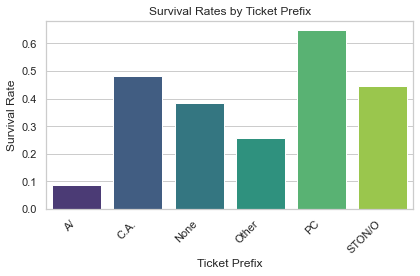

In [1041]:
#visualize survival rate by prefix
survival_by_prefix = titanic_data.groupby('Ticket_Prefix_Grouped')['Survived'].mean().reset_index()
sns.barplot(x='Ticket_Prefix_Grouped', y='Survived', data=survival_by_prefix, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Survival Rates by Ticket Prefix')
plt.xlabel('Ticket Prefix')
plt.ylabel('Survival Rate')
plt.tight_layout()
plt.show()


### Bivariate Analysis

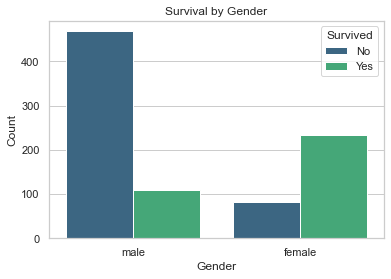

In [1042]:

# Visualize survival rates by gender
sns.countplot(data=titanic_data, x='Sex', hue='Survived', palette='viridis')
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


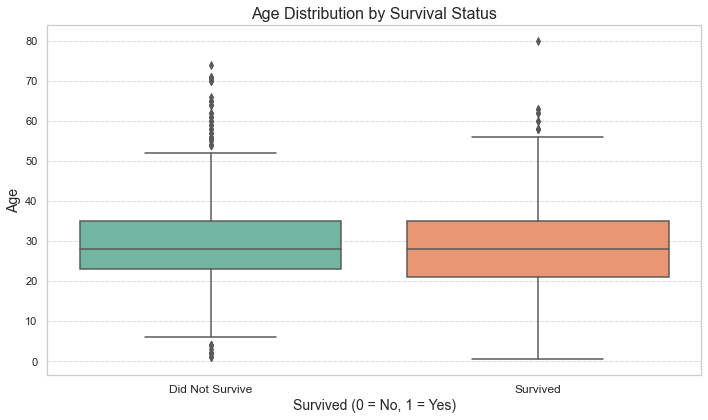

In [1043]:
# Boxplot to compare age distribution of survivors and non-survivors
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=titanic_data, palette='Set2')

# Customizing the plot
plt.title('Age Distribution by Survival Status', fontsize=16)
plt.xlabel('Survived (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Did Not Survive', 'Survived'], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

### Multivariate analysis

In [1044]:
#Pivot Table: Survival rates by Pclass and Sex
pivot_table = titanic_data.pivot_table(values='Survived', index='Pclass', columns='Sex', aggfunc='mean')
print("Survival Rates by Pclass and Sex:")
print(pivot_table)

Survival Rates by Pclass and Sex:
Sex       female      male
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


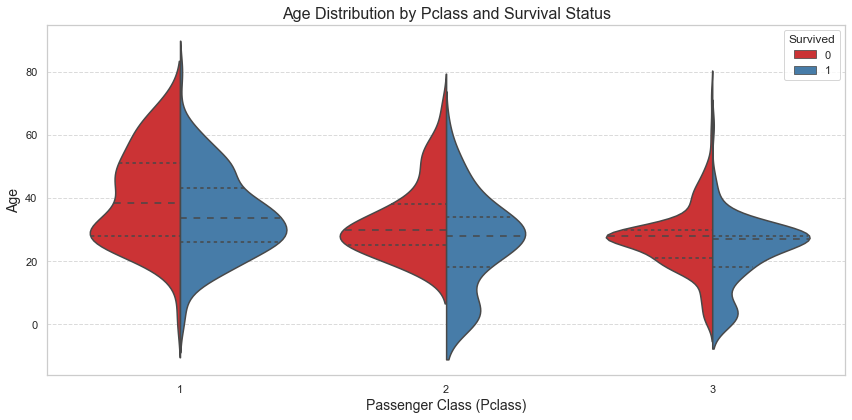

In [1045]:
#"What is the age distribution of passengers across different classes based on their survival status?
# # 2. Visualization: Survival by Pclass, Sex, and Age
plt.figure(figsize=(12, 6))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=titanic_data, inner='quart',split=True, palette='Set1')



# Customizing the plot
plt.title('Age Distribution by Pclass and Survival Status', fontsize=16)
plt.xlabel('Passenger Class (Pclass)', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



Embarkation Port Analysis

Do passengers embarking from certain ports have significantly different survival outcomes, and is this related to fare?

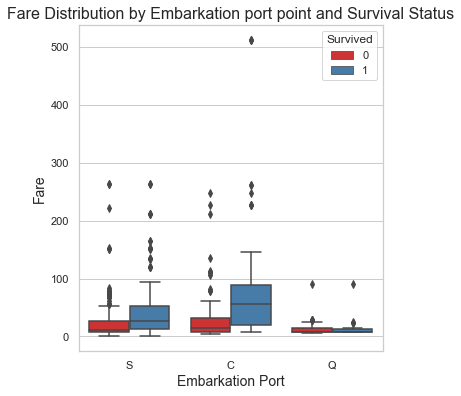

In [1046]:
# Did those who embarked at different points have different survival rates, and how does it relate with fare?
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Embarked', y='Fare', hue='Survived', data=titanic_data, palette='Set1')

# Customizing the plot
plt.title('Fare Distribution by Embarkation port point and Survival Status', fontsize=16)
plt.xlabel('Embarkation Port', fontsize=14)
plt.ylabel('Fare', fontsize=14)
plt.legend(title='Survived', loc='upper right')
plt.show()

Survival Analysis across Age and Fare Buckets

Are younger passengers in higher fare ranges more likely to survive? 

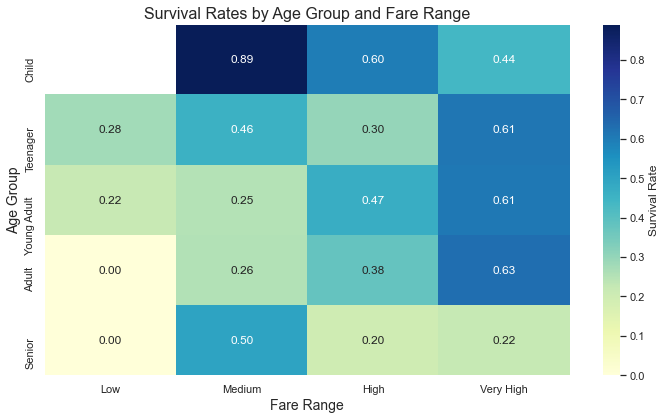

In [1047]:
# Create age bins
titanic_data['AgeGroup'] = pd.cut(
    titanic_data['Age'], 
    bins=[0, 12, 18, 35, 60, 80], 
    labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
)

# Create fare bins
titanic_data['FareRange'] = pd.qcut(titanic_data['Fare'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Calculate survival rates by AgeGroup and FareRange
survival_rates = titanic_data.groupby(['AgeGroup', 'FareRange'])['Survived'].mean().unstack()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(survival_rates, annot=True, cmap='YlGnBu', fmt=".2f", cbar_kws={'label': 'Survival Rate'})

# Customizing the plot
plt.title('Survival Rates by Age Group and Fare Range', fontsize=16)
plt.xlabel('Fare Range', fontsize=14)
plt.ylabel('Age Group', fontsize=14)

plt.tight_layout()
plt.show()

Correlation Matrix 

 Do larger families (higher SibSp and Parch) tend to have higher or lower survival rates?

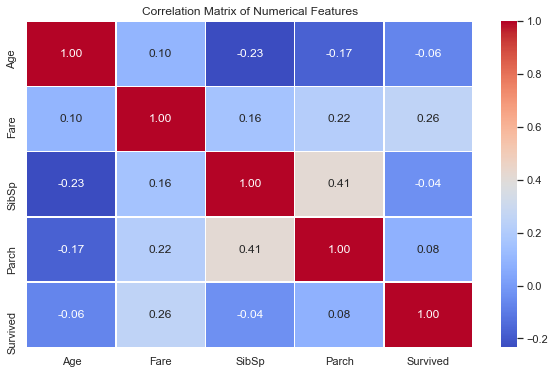

Correlation between SibSp and Parch: 0.41483769862015624
Correlation between Survived and SibSp: -0.03532249888573556
Correlation between Survived and Parch: 0.08162940708348335


In [1048]:
# Numerical features for analysis
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch', 'Survived']

# Compute the correlation matrix
correlation_matrix = titanic_data[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Analysis: Check correlation values between SibSp, Parch, and Survived
sibsp_parch_corr = correlation_matrix.loc['SibSp', 'Parch']
survived_sibsp_corr = correlation_matrix.loc['Survived', 'SibSp']
survived_parch_corr = correlation_matrix.loc['Survived', 'Parch']

print("Correlation between SibSp and Parch:", sibsp_parch_corr)
print("Correlation between Survived and SibSp:", survived_sibsp_corr)
print("Correlation between Survived and Parch:", survived_parch_corr)

from the heatmap above, the table is mostly blue, indicating the features have no high corelation hence weak collinearity

### Feature Engineering

In [1049]:
#backup original dataframe 
titanic_data =titanic_data.copy()

In [1050]:
#Combine SibSp and Parch into a single feature
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1
titanic_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Ticket_Prefix,Ticket_Number,Ticket_Prefix_Grouped,AgeGroup,FareRange,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,A/,21171,A/,Young Adult,Low,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,PC,17599,PC,Adult,Very High,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,STON/O,3101282,STON/O,Young Adult,Medium,1


In [1051]:
#extract the titles from the names- titles indicate social status or agr group, affecting survival chances 
titanic_data['Title'] = titanic_data['Name'].str.extract('([A-Za-z]+)\.', expand=False)
titanic_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Ticket_Prefix,Ticket_Number,Ticket_Prefix_Grouped,AgeGroup,FareRange,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,A/,21171,A/,Young Adult,Low,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,PC,17599,PC,Adult,Very High,2,Mrs


In [1052]:
print(titanic_data['Title'].value_counts())


Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64


In [1053]:
rare_titles = ['Master', "Lady", 'Mme', 'Countess','Capt', 'Sir', 'Col', 'Don', 'Dr', 'Major','Ms', 'Rev', 'Sir', 'Jonkheer', 'Mlle']

titanic_data['Title'] = titanic_data['Title'].replace(rare_titles, 'Rare')
titanic_data['Title'] = titanic_data['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})


In [1054]:
print(titanic_data['Title'].value_counts())


Title
Mr      517
Miss    182
Mrs     125
Rare     67
Name: count, dtype: int64


In [1055]:
title_survival_rate = titanic_data.groupby('Title')['Survived'].mean()
print(title_survival_rate)




Title
Miss    0.697802
Mr      0.156673
Mrs     0.792000
Rare    0.522388
Name: Survived, dtype: float64


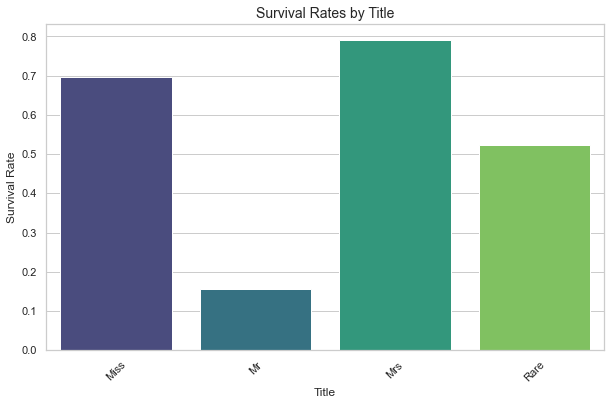

In [1056]:


plt.figure(figsize=(10, 6))
sns.barplot(x=title_survival_rate.index, y=title_survival_rate.values, palette='viridis')
plt.title('Survival Rates by Title', fontsize=14)
plt.ylabel('Survival Rate', fontsize=12)
plt.xlabel('Title', fontsize=12)
plt.xticks(rotation=45)
plt.show()


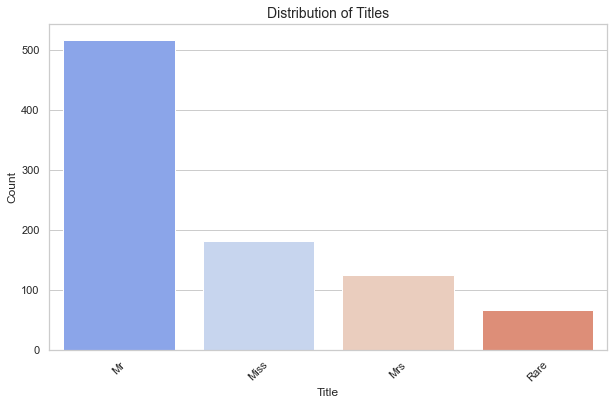

In [1057]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Title', data=titanic_data, palette='coolwarm', order=titanic_data['Title'].value_counts().index)
plt.title('Distribution of Titles', fontsize=14)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Title', fontsize=12)
plt.xticks(rotation=45)
plt.show()


<Figure size 864x432 with 0 Axes>

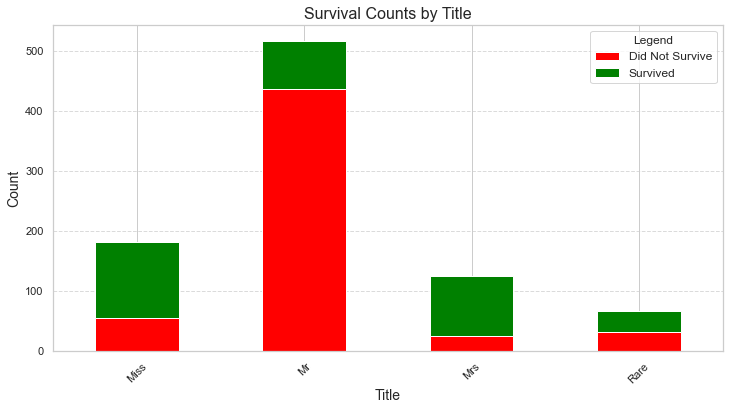

In [1058]:
# Group data by 'Title' and 'Survived'
title_survival_counts =titanic_data.groupby(['Title', 'Survived']).size().unstack()

# Plot the data
plt.figure(figsize=(12, 6))
title_survival_counts.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(12, 6))
plt.title('Survival Counts by Title', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Title', fontsize=14)
plt.xticks(rotation=45)
plt.legend(['Did Not Survive', 'Survived'], title='Legend', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [1059]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   PassengerId            891 non-null    int64   
 1   Survived               891 non-null    int64   
 2   Pclass                 891 non-null    int64   
 3   Name                   891 non-null    object  
 4   Sex                    891 non-null    object  
 5   Age                    891 non-null    float64 
 6   SibSp                  891 non-null    int64   
 7   Parch                  891 non-null    int64   
 8   Ticket                 891 non-null    object  
 9   Fare                   891 non-null    float64 
 10  Embarked               891 non-null    object  
 11  Ticket_Prefix          891 non-null    object  
 12  Ticket_Number          887 non-null    object  
 13  Ticket_Prefix_Grouped  891 non-null    object  
 14  AgeGroup               891 non-null    cat

In [1060]:
#titanic_data.drop(['Name', 'Ticket', 'Ticket_Prefix', 'Ticket_Number'], axis=1, inplace=True)
titanic_data['Pclass'] =titanic_data['Pclass'].astype(str)


In [1061]:
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])


In [1062]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   PassengerId            891 non-null    int64   
 1   Survived               891 non-null    int64   
 2   Pclass                 891 non-null    object  
 3   Name                   891 non-null    object  
 4   Sex                    891 non-null    object  
 5   Age                    891 non-null    float64 
 6   SibSp                  891 non-null    int64   
 7   Parch                  891 non-null    int64   
 8   Ticket                 891 non-null    object  
 9   Fare                   891 non-null    float64 
 10  Embarked               891 non-null    object  
 11  Ticket_Prefix          891 non-null    object  
 12  Ticket_Number          887 non-null    object  
 13  Ticket_Prefix_Grouped  891 non-null    object  
 14  AgeGroup               891 non-null    cat

In [1063]:
titanic_data.isnull().sum() / len(titanic_data) * 100


PassengerId              0.000000
Survived                 0.000000
Pclass                   0.000000
Name                     0.000000
Sex                      0.000000
Age                      0.000000
SibSp                    0.000000
Parch                    0.000000
Ticket                   0.000000
Fare                     0.000000
Embarked                 0.000000
Ticket_Prefix            0.000000
Ticket_Number            0.448934
Ticket_Prefix_Grouped    0.000000
AgeGroup                 0.000000
FareRange                0.000000
FamilySize               0.000000
Title                    0.000000
dtype: float64

I have missing values in the ticket_number columns - the best approach is to drop the column that has 44% of rows with missing values 

In [1064]:
#drop the column
# Drop the identified columns
titanic_data.drop(columns='Ticket_Number', inplace=True)


In [1065]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   PassengerId            891 non-null    int64   
 1   Survived               891 non-null    int64   
 2   Pclass                 891 non-null    object  
 3   Name                   891 non-null    object  
 4   Sex                    891 non-null    object  
 5   Age                    891 non-null    float64 
 6   SibSp                  891 non-null    int64   
 7   Parch                  891 non-null    int64   
 8   Ticket                 891 non-null    object  
 9   Fare                   891 non-null    float64 
 10  Embarked               891 non-null    object  
 11  Ticket_Prefix          891 non-null    object  
 12  Ticket_Prefix_Grouped  891 non-null    object  
 13  AgeGroup               891 non-null    category
 14  FareRange              891 non-null    cat

### Preprocessing 

Before modelling the data, I need to make sure that the data is clean, structured and ready for machine learning algorithms.

In [1066]:
# 1. Handle Categorical Variables using one hot encoding. Pclass, Sex, Embarked, Ticket_prefix_Grouped, Title,
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Pclass', 'Embarked', 'Title', 'Ticket_Prefix_Grouped'], drop_first=True)



In [1067]:
# 2. Drop the irrelevant object columns 
titanic_data.drop(columns=['PassengerId','Name', 'Ticket',  'Ticket_Prefix'], inplace=True)

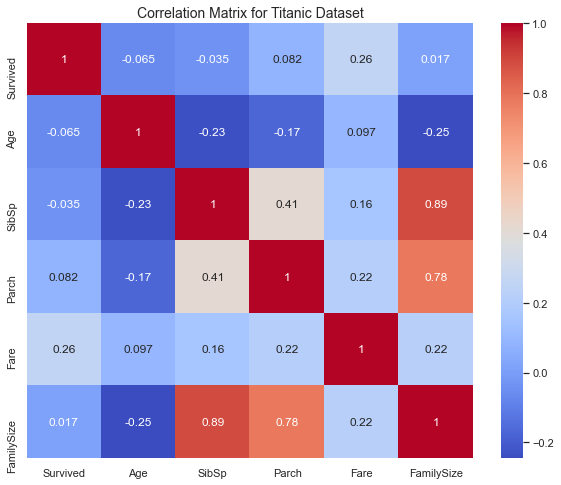

In [1068]:
# 3. Check for Multicollinearity
# Filter for numeric columns only
numeric_data = titanic_data.select_dtypes(include=['number'])

# Calculate correlation matrix
corr_matrix = numeric_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Titanic Dataset', fontsize=14)
plt.show()


from the heat map above, it appears that 'Sibsp', 'Parch', and 'FamilySize' are highly correlated, hence their collinearity is high as well. 
The best approach would be to drop the 'Sibsp', 'Parch'

In [1069]:
# Drop SibSp and Parch, keeping FamilySize
titanic_data = titanic_data.drop(['SibSp', 'Parch'], axis=1)


In [1070]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Survived                      891 non-null    int64   
 1   Age                           891 non-null    float64 
 2   Fare                          891 non-null    float64 
 3   AgeGroup                      891 non-null    category
 4   FareRange                     891 non-null    category
 5   FamilySize                    891 non-null    int64   
 6   Sex_male                      891 non-null    bool    
 7   Pclass_2                      891 non-null    bool    
 8   Pclass_3                      891 non-null    bool    
 9   Embarked_Q                    891 non-null    bool    
 10  Embarked_S                    891 non-null    bool    
 11  Title_Mr                      891 non-null    bool    
 12  Title_Mrs                     891 non-null    bool

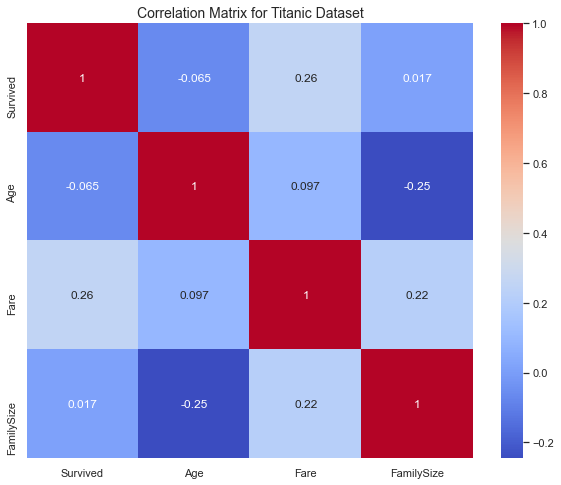

In [1073]:
#check for multicollinearity again 
# 3. Check for Multicollinearity
# Filter for numeric columns only
numeric_data = titanic_data.select_dtypes(include=['number'])

# Calculate correlation matrix
corr_matrix = numeric_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Titanic Dataset', fontsize=14)
plt.show()